**1/30/20**

The purpose of this notebook is to compare the results generated by searching all 29 samples against the five more manageably-sized databases: 16S_Pooled, 16S_Sample-Matched, Shotgun_Pooled, Shotgun_Sample-Matched, Hybrid_Sample-Matched

In [2]:
from elliot_utils import *

In [3]:
analysisPath = Path.cwd().joinpath('analysis_files/3_databases_comparison/')
figPath = Path.cwd().joinpath('figures/comparing_database_types/')
communityResults = getOrderedFiles(COMMUNITY_RESULTS, '.tsv')
tailoredResults = getOrderedFiles(TAILORED_RESULTS, '.tsv')
pooledResults = getOrderedFiles(POOLED_RESULTS, '.tsv')
singleResults = getOrderedFiles(SINGLE_RESULTS, '.tsv')
hybridResults = getOrderedFiles(HYBRID_RESULTS, '.tsv')

In [4]:
# Parsing function to pull out the number of spectra of the given type in the sample
def countSpectra(resultsList, lookFor, allowed):
    counts = []
    allowedPeps = allowed.copy()
    for res in resultsList:
        with res.open(mode='r') as infile:
            reader = csv.reader(infile, delimiter='\t')
            count = 0
            for row in reader:
                protType = determineIDType(row)
                if protType == 'first':
                    continue
                if not isSignificant(row):
                    break
                if protType == lookFor and row[PEPTIDE] in allowedPeps:
                    count += 1
        counts.append(count)
    return counts

In [5]:
dbLabels = []
dbLabels += ['16S_Pooled' for x in range(29)]
dbLabels += ['16S_Sample-Matched' for x in range(29)]
dbLabels += ['Shotgun_Pooled' for x in range(29)]
dbLabels += ['Shotgun_Sample-Matched' for x in range(29)]
dbLabels += ['Hybrid_Sample-Matched' for x in range(29)]

In [6]:
cAllowedHumanPeps = getFilteredPeptides(communityResults, 'human')
tAllowedHumanPeps = getFilteredPeptides(tailoredResults, 'human')
pAllowedHumanPeps = getFilteredPeptides(pooledResults, 'human')
sAllowedHumanPeps = getFilteredPeptides(singleResults, 'human')
hAllowedHumanPeps = getFilteredPeptides(hybridResults, 'human')
cAllowedNonhumanPeps = getFilteredPeptides(communityResults, 'bacteria')
tAllowedNonhumanPeps = getFilteredPeptides(tailoredResults, 'bacteria')
pAllowedNonhumanPeps = getFilteredPeptides(pooledResults, 'bacteria')
sAllowedNonhumanPeps = getFilteredPeptides(singleResults, 'bacteria')
hAllowedNonhumanPeps = getFilteredPeptides(hybridResults, 'bacteria')

In [7]:
cFilteredHumanCount = countSpectra(communityResults, 'human', cAllowedHumanPeps)
tFilteredHumanCount = countSpectra(tailoredResults, 'human', tAllowedHumanPeps)
pFilteredHumanCount = countSpectra(pooledResults, 'human', pAllowedHumanPeps)
sFilteredHumanCount = countSpectra(singleResults, 'human', sAllowedHumanPeps)
hFilteredHumanCount = countSpectra(hybridResults, 'human', hAllowedHumanPeps)

In [8]:
minusGlobalColors = sns.color_palette('bright', 10)[1:6]

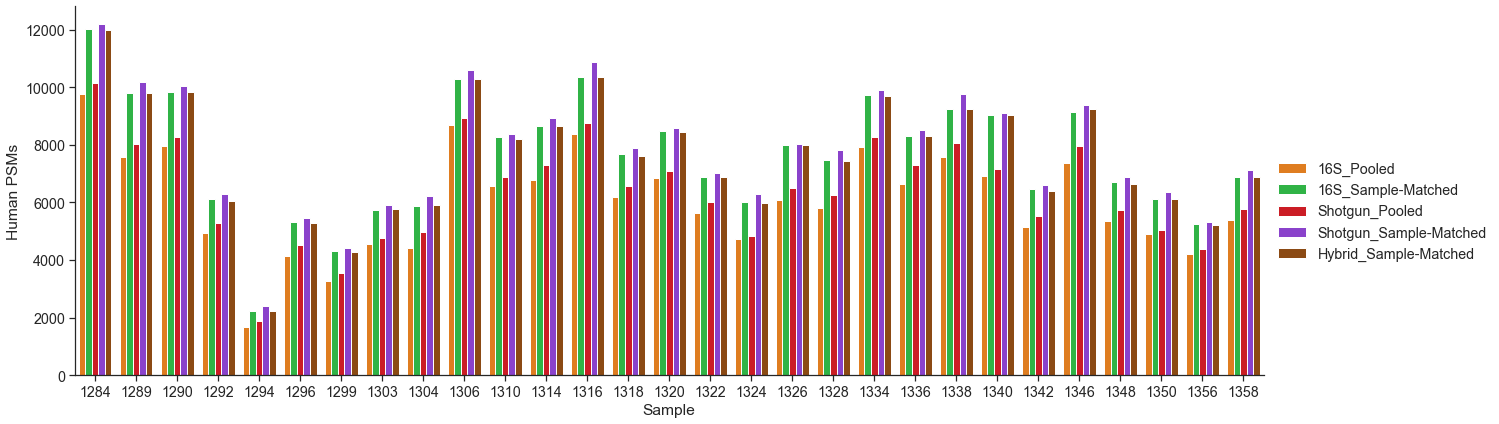

In [9]:
humanFilteredCountsDF = pd.DataFrame({'Spectral Count': cFilteredHumanCount + tFilteredHumanCount + pFilteredHumanCount + sFilteredHumanCount + hFilteredHumanCount, 'Sample': SAMPLE_NAMES + SAMPLE_NAMES + SAMPLE_NAMES + SAMPLE_NAMES + SAMPLE_NAMES, '':dbLabels})
humanFilteredSpectraGraph = sns.catplot(x='Sample', y='Spectral Count', hue='', data=humanFilteredCountsDF, height=6, aspect=3, kind='bar', palette=minusGlobalColors)
humanFilteredSpectraGraph.set_ylabels('Human PSMs')

In [11]:
cFilteredNonhumanCount = countSpectra(communityResults, 'bacteria', cAllowedNonhumanPeps)
tFilteredNonhumanCount = countSpectra(tailoredResults, 'bacteria', tAllowedNonhumanPeps)
pFilteredNonhumanCount = countSpectra(pooledResults, 'bacteria', pAllowedNonhumanPeps)
sFilteredNonhumanCount = countSpectra(singleResults, 'bacteria', sAllowedNonhumanPeps)
hFilteredNonhumanCount = countSpectra(hybridResults, 'bacteria', hAllowedNonhumanPeps)

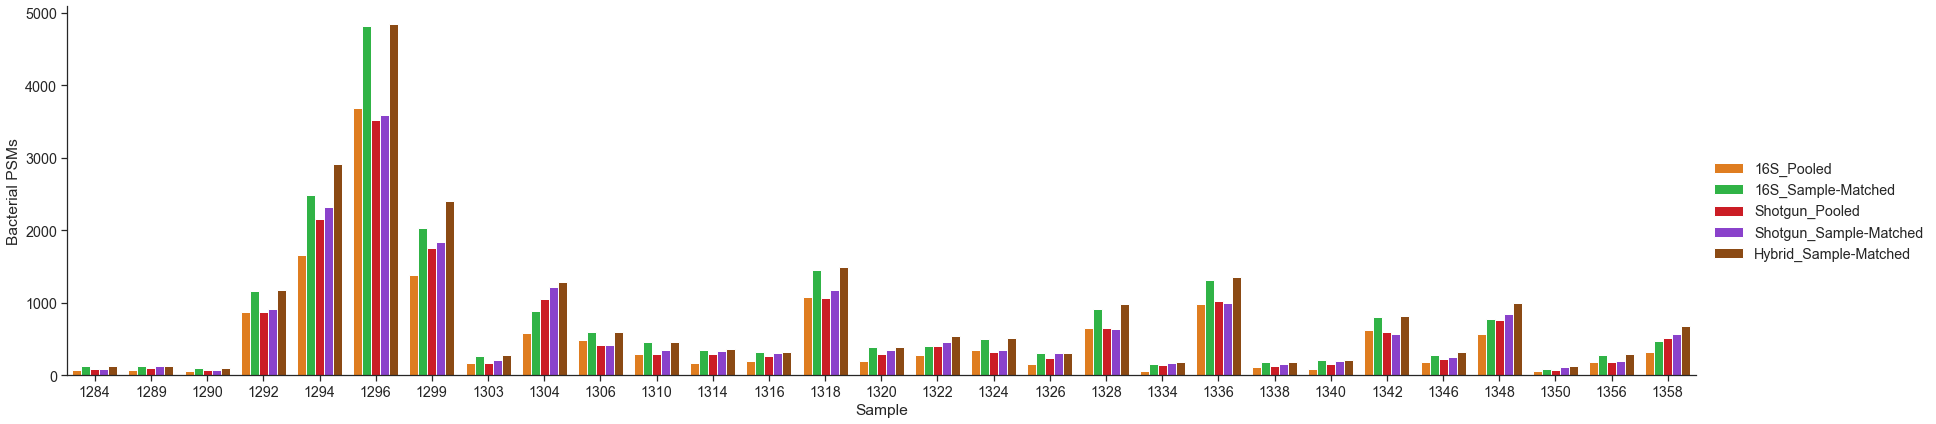

In [11]:
nonhumanFilteredCountsDF = pd.DataFrame({'Spectral Count': cFilteredNonhumanCount + tFilteredNonhumanCount + pFilteredNonhumanCount + sFilteredNonhumanCount + hFilteredNonhumanCount, 'Sample': SAMPLE_NAMES + SAMPLE_NAMES + SAMPLE_NAMES + SAMPLE_NAMES + SAMPLE_NAMES, '':dbLabels})
nonhumanFilteredSpectraGraph = sns.catplot(x='Sample', y='Spectral Count', hue='', data=nonhumanFilteredCountsDF, height=6, aspect=4, kind='bar', palette=minusGlobalColors)
nonhumanFilteredSpectraGraph.set_ylabels('Bacterial PSMs')

In [9]:
thOnlyColors = [sns.color_palette('bright', 10)[2], sns.color_palette('bright', 10)[5]]

In [12]:
thOnlyIndexes = [SAMPLE_NAMES.index('1306'), SAMPLE_NAMES.index('1310'), SAMPLE_NAMES.index('1320'), SAMPLE_NAMES.index('1342')]
thOnlySampleNames = ['1306', '1310', '1320', '1342']
thOnlyLabels = []
thOnlyLabels += ['Public_Sample-Matched' for x in range(len(thOnlySampleNames))]
thOnlyLabels += ['Hybrid_Sample-Matched' for x in range(len(thOnlySampleNames))]
thOnlyTCount = []
thOnlyHCount = []
for i in thOnlyIndexes:
    thOnlyTCount.append(tFilteredNonhumanCount[i])
    thOnlyHCount.append(hFilteredNonhumanCount[i])

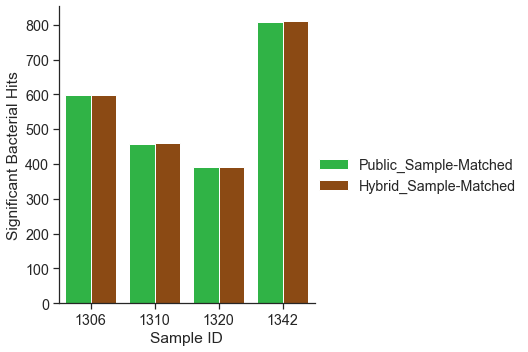

In [14]:
thNonhumanFilteredCountsDF = pd.DataFrame({'Spectral Count':thOnlyTCount + thOnlyHCount, 'Sample ID':thOnlySampleNames + thOnlySampleNames, '':thOnlyLabels})
thNonhumanFilteredGraph = sns.catplot(x='Sample ID', y='Spectral Count', hue='', data=thNonhumanFilteredCountsDF, kind='bar', palette=thOnlyColors)
thNonhumanFilteredGraph.set_ylabels('Significant Bacterial Hits')
thNonhumanFilteredGraph.savefig(figPath.joinpath('tailored_hybrid_bacteria_psms.png'))

In [13]:
# Returns a list in the form: [toAdd, iterable[0], iterable[1]...]
def addToListStart(toAdd, iterable):
    toReturn = [toAdd]
    for x in iterable:
        toReturn.append(x)
    return toReturn

In [14]:
# Make a list to act as a header with the sample numbers
sampleHeader = []
for x in SAMPLE_MANUSCRIPT_IDS:
    sampleHeader.append(x)

In [16]:
# Write the PSM counts for each database to file for both human and bacteria
with analysisPath.joinpath('all_samples_human_psms.csv').open(mode='w', newline='') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(addToListStart('', sampleHeader))
    writer.writerow(addToListStart('16S_Pooled', cFilteredHumanCount))
    writer.writerow(addToListStart('16S_Sample-Matched', tFilteredHumanCount))
    writer.writerow(addToListStart('Shotgun_Pooled', pFilteredHumanCount))
    writer.writerow(addToListStart('Shotgun_Sample-Matched', sFilteredHumanCount))
    writer.writerow(addToListStart('Hybrid_Sample-Matched', hFilteredHumanCount))

In [18]:
with analysisPath.joinpath('all_samples_bacteria_psms.csv').open(mode='w', newline='') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(addToListStart('', sampleHeader))
    writer.writerow(addToListStart('16S_Pooled', cFilteredNonhumanCount))
    writer.writerow(addToListStart('16S_Sample-Matched', tFilteredNonhumanCount))
    writer.writerow(addToListStart('Shotgun_Pooled', pFilteredNonhumanCount))
    writer.writerow(addToListStart('Shotgun_Sample-Matched', sFilteredNonhumanCount))
    writer.writerow(addToListStart('Hybrid_Sample-Matched', hFilteredNonhumanCount))

In [18]:
# Use the wilcoxon signed-rank test to see whether or not different databases generate significantly more human/bacterial PSMs in the samples
from scipy import stats

In [19]:
# Place the counts in arrays so I can easily access them
dbOrder = ['16S_Pooled', '16S_Sample-Matched', 'Shotgun_Pooled', 'Shotgun_Sample-Matched', 'Hybrid_Sample-Matched']
humanDataArray = [cFilteredHumanCount, tFilteredHumanCount, pFilteredHumanCount, sFilteredHumanCount, hFilteredHumanCount]
bacteriaDataArray = [cFilteredNonhumanCount, tFilteredNonhumanCount, pFilteredNonhumanCount, sFilteredNonhumanCount, hFilteredNonhumanCount]

In [20]:
# Runs wilcoxon ranked-order tests against each combination of arrays in dataArray, using dataOrder as a guide, then outputs the results to outPath
# Returns a 2D array of the p-values where out[0][1] is dataOrder[0] > dataOrder[1], out[0][2] is dataOrder[0] > dataOrder[2], etc.
def generateWilcoxonCSV(dataArray, dataOrder, outPath):
    toReturn = []
    with outPath.open(mode='w', newline='') as outfile:
        writer = csv.writer(outfile)
        writer.writerow(['database', 'comparator', 'p-value'])
        for i in range(len(dataArray)):
            toAppend = []
            for j in range(len(dataArray)):
                pval = 1
                if not i == j:
                    pval = stats.wilcoxon(dataArray[i], dataArray[j], alternative='greater')[1]
                writer.writerow([dataOrder[i], dataOrder[j], pval])
                toAppend.append(pval)
            toReturn.append(toAppend)
    return toReturn

In [21]:
humanPvals = generateWilcoxonCSV(humanDataArray, dbOrder, analysisPath.joinpath('wilcoxon_human.csv'))
bacteriaPvals = generateWilcoxonCSV(bacteriaDataArray, dbOrder, analysisPath.joinpath('wilcoxon_bacteria.csv'))

In [22]:
pValColors = [sns.color_palette('bright', 10)[1]]
for i in range(100):
    pValColors.append(sns.color_palette('bright', 10)[0])

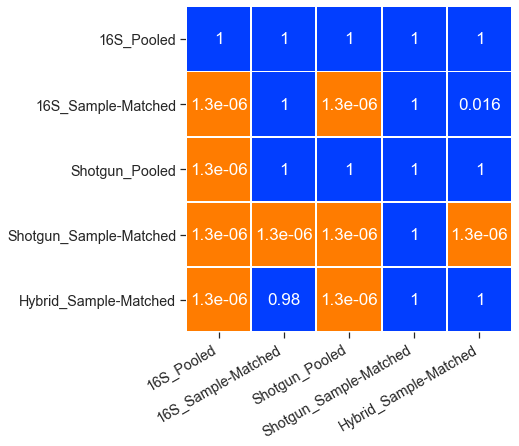

In [23]:
humanPGraph = sns.heatmap(humanPvals, annot=True, cmap=pValColors, xticklabels=dbOrder, yticklabels=dbOrder, linewidths=1, square=True, cbar=False, annot_kws={'size':17})
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.xticks(rotation=30, ha='right') 
plt.gcf().set_size_inches(6, 6)
plt.savefig(figPath.joinpath('wilcoxon_tests_human.png'), dpi=300, bbox_inches='tight')
plt.show() # ta-da!

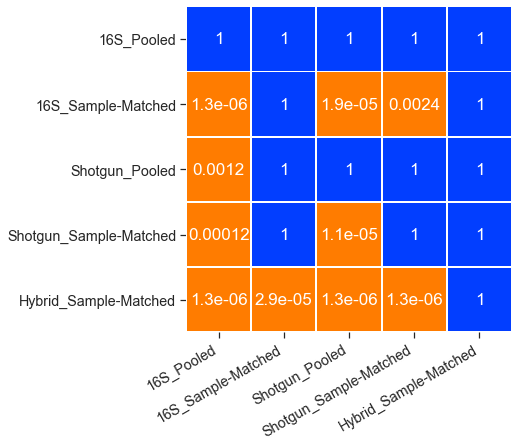

In [24]:
bacteriaPGraph = sns.heatmap(bacteriaPvals, annot=True, cmap=pValColors, xticklabels=dbOrder, yticklabels=dbOrder, linewidths=1, square=True, cbar=False, annot_kws={'size':17})
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.xticks(rotation=30, ha='right') 
plt.gcf().set_size_inches(6, 6)
plt.savefig(figPath.joinpath('wilcoxon_tests_bacteria.png'), dpi=300, bbox_inches='tight')
plt.show() # ta-da!

In [17]:
# For each database, determine what % of significant bacterial PSMs can be tied to a single genus or species
# Output this information to a CSV file
communityProtRef = ProtRef(COMMUNITY_DB.joinpath('Community5_Refined.fasta'))
pooledProtRef = ProtRef(POOLED_DB.joinpath('metagenomicCombined_refined_1.fasta'))
tailoredProtRefs = []
for db in getOrderedFiles(TAILORED_DB, '.fasta'):
    tailoredProtRefs.append(ProtRef(db))
singleProtRefs = []
for db in getOrderedFiles(SINGLE_DB, '.fasta'):
    singleProtRefs.append(ProtRef(db))
hybridProtRefs = []
for db in getOrderedFiles(HYBRID_DB, '.fasta'):
    hybridProtRefs.append(ProtRef(db))

In [37]:
# Helper function that returns false if the given string is not the name of a genus and species of bacteria
def isValidName(taxaName):
    if taxaName == 'Bacteria':
        return False
    invalidList = ['Unknown', 'unclassified', 'aceae', 'Terrabacteria', 'Proteobacteria', 'Negativicutes', 'ales', 'Gammaproteobacteria',
                  'Firmicutes', 'Bacteroidetes', 'Actinobacteria']
    for invalid in invalidList:
        if taxaName.find(invalid) != -1:
            return False
    return True

# Helper function that scans a single result file and returns the percent of bacterial PSMs that only match a single [genus, species]
def getUniquesFromResult(resultFile, protRef, allowedPeps):
    total = 0
    genusCount = 0
    speciesCount = 0
    with resultFile.open(mode='r') as tsvin:
        tsvReader = csv.reader(tsvin, delimiter='\t')
        for row in tsvReader:
            if row[PROTEIN_HITS] == 'Protein':
                continue
            if not isSignificant(row):
                break
            protType = determineIDType(row)
            if protType == 'bacteria' and row[PEPTIDE] in allowedPeps:
                total += 1
                hitProteins = getProteinHitList(row, 'bacteria')
                hitGenera = set()
                hitSpecies = set()
                for hit in hitProteins:
                    for t in protRef.getProt(hit).taxa:
                        if isValidName(t):
                            hitGenera.add(getFirstWord(t))
                            hitSpecies.add(t)
                if len(hitGenera) == 1:
                    genusCount += 1
                if len(hitSpecies) == 1:
                    speciesCount += 1
    genusPercent = (genusCount / total) * 100
    speciesPercent = (speciesCount / total) * 100
    return genusPercent, speciesPercent

# Function that gets the average percent of bacterial PSMs that only match a single genus, species
def getPercentsUnique(results, protRef, allowedPeps, dbString, multipleRefs=True):
    genusPercents = []
    speciesPercents = []
    for i in range(len(results)):
        ref = protRef
        if multipleRefs:
            ref = protRef[i]
        genusPercent, speciesPercent = getUniquesFromResult(results[i], ref, allowedPeps)
        genusPercents.append(genusPercent)
        speciesPercents.append(speciesPercent)
    genusAverage = sum(genusPercents) / len(genusPercents)
    speciesAverage = sum(speciesPercents) / len(speciesPercents)
    return [dbString, genusAverage, speciesAverage]

In [38]:
uniquesRows = []
uniquesRows.append(getPercentsUnique(communityResults, communityProtRef, cAllowedNonhumanPeps, '16S_Pooled', multipleRefs=False))
uniquesRows.append(getPercentsUnique(tailoredResults, tailoredProtRefs, tAllowedNonhumanPeps, '16S_Sample-Matched'))
uniquesRows.append(getPercentsUnique(pooledResults, pooledProtRef, pAllowedNonhumanPeps, 'Shotgun_Pooled', multipleRefs=False))
uniquesRows.append(getPercentsUnique(singleResults, singleProtRefs, sAllowedNonhumanPeps, 'Shotgun_Sample-Matched'))
uniquesRows.append(getPercentsUnique(hybridResults, hybridProtRefs, hAllowedNonhumanPeps, 'Hybrid_Sample-Matched'))

In [43]:
# Write the average percent of PSMs the matched a single genus and species for each db type to a csv file
with analysisPath.joinpath('single_taxa_psm_assignments.csv').open(mode='w', newline='') as outfile:
    header = ['Database', 'Genus', 'Species']
    writer = csv.writer(outfile)
    writer.writerow(header)
    for row in uniquesRows:
        writer.writerow(row)

In [25]:
mostDbLabels = []
mostDbLabels += ['16S_Sample-Matched' for x in range(29)]
mostDbLabels += ['Shotgun_Pooled' for x in range(29)]
mostDbLabels += ['Shotgun_Sample-Matched' for x in range(29)]
mostDbLabels += ['Hybrid_Sample-Matched' for x in range(29)]

mostSampleLabels = []
for i in range(len(bacteriaDataArray) - 1):
    for j in range(len(SAMPLE_NAMES)):
        mostSampleLabels.append(SAMPLE_NAMES[j])
bacteriaRelativeData = []
for i in range(1, len(bacteriaDataArray)):
    for j in range(len(bacteriaDataArray[i])):
        bacteriaRelativeData.append(bacteriaDataArray[i][j] / bacteriaDataArray[0][j])

In [27]:
humanSampleMeans = []
for i in range(len(humanDataArray[0])):
    summed = 0
    for j in range(len(humanDataArray)):
        summed += humanDataArray[j][i]
    humanSampleMeans.append(summed / len(humanDataArray))

humanRelativeMeans = []
for i in range(len(humanDataArray)):
    for j in range(len(humanDataArray[i])):
        humanRelativeMeans.append(humanDataArray[i][j] / humanSampleMeans[j])

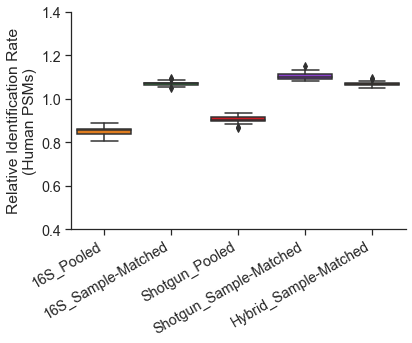

In [28]:
humanRelativeMeansDF = pd.DataFrame({'database':dbLabels, 'Relative Identification Rate':humanRelativeMeans})
plt.xticks(rotation=30, ha='right') 
humanPsmMeansBox = sns.boxplot(data=humanRelativeMeansDF, x='database', y='Relative Identification Rate', palette=minusGlobalColors)
humanPsmMeansBox.set(ylim=(0.4, 1.4), xlabel='', ylabel='Relative Identification Rate\n(Human PSMs)')
sns.despine()
saveFig(humanPsmMeansBox, figPath.joinpath('human_database_identification_rate.png'))

In [38]:
bacterialSampleMeans = []
for i in range(len(bacteriaDataArray[0])):
    summed = 0
    for j in range(len(bacteriaDataArray)):
        summed += bacteriaDataArray[j][i]
    bacterialSampleMeans.append(summed / len(bacteriaDataArray))

bacterialRelativeMeans = []
for i in range(len(bacteriaDataArray)):
    for j in range(len(bacteriaDataArray[i])):
        bacterialRelativeMeans.append(bacteriaDataArray[i][j] / bacterialSampleMeans[j])

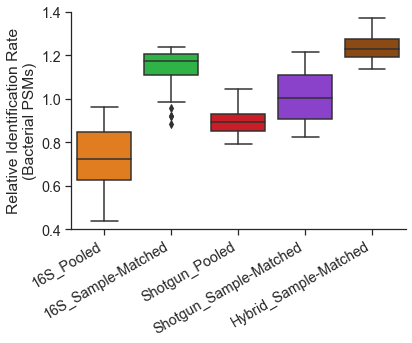

In [61]:
bacterialRelativeMeansDF = pd.DataFrame({'database':dbLabels, 'Relative Identification Rate':bacterialRelativeMeans})
plt.xticks(rotation=30, ha='right') 
psmMeansBox = sns.boxplot(data=bacterialRelativeMeansDF, x='database', y='Relative Identification Rate', palette=minusGlobalColors)
psmMeansBox.set(ylim=(0.4, 1.4), xlabel='', ylabel='Relative Identification Rate\n(Bacterial PSMs)')
sns.despine()
saveFig(psmMeansBox, figPath.joinpath('bacteria_database_identification_rate.png'))